In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re
import seaborn as sns
from statistics import mode 
%matplotlib inline

df = pd.read_csv('Desktop\Thinkful Directory\heart.csv', encoding="UTF-8")

# Factors of Heart Disease

## An explorative analysis of four factors relating to heart disease

1. Introduction
2. Sex
3. Age
4. Cholestrol
5. Chest Pain
6. Research Proposal

### 1. Introduction

In [2]:
#intro text
print("This data set contains 303 patients. For each patient, 14 attributes revolving the patient's current health. I will be focusing on five attributes. The last attributed indicates if the patient has heart disease. According to UCI's website, the orignial   dataset was donated over 30 years ago on 1988-07-01 and almost all the paitients are over 30.") 
print()

print("Sources:")
print("Data file taken from: https://www.kaggle.com/ronitf/heart-disease-uci/downloads/heart.csv/1")
print("The original source of the data: https://archive.ics.uci.edu/ml/datasets/heart+Disease")
print("Attribute clarifications by user IntiPic: https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877#latest-612520")

print()

print("Acknowledgements")
print("Creators:")
print("1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.")
print("2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.") 
print("3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.")
print("4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.")

print("Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779")

print()
print()

This data set contains 303 patients. For each patient, 14 attributes revolving the patient's current health. I will be focusing on five attributes. The last attributed indicates if the patient has heart disease. According to UCI's website, the orignial   dataset was donated over 30 years ago on 1988-07-01 and almost all the paitients are over 30.

Sources:
Data file taken from: https://www.kaggle.com/ronitf/heart-disease-uci/downloads/heart.csv/1
The original source of the data: https://archive.ics.uci.edu/ml/datasets/heart+Disease
Attribute clarifications by user IntiPic: https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877#latest-612520

Acknowledgements
Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor: Da

In [3]:
df["target"].replace(0, "Has Heart Disease", inplace=True)
df["target"].replace(1, "No Heart Disease", inplace=True)
df["sex"].replace(0, "Female", inplace=True)
df["sex"].replace(1, "Male", inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,No Heart Disease
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,No Heart Disease
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,No Heart Disease
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,No Heart Disease
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,No Heart Disease


### 2. Sex

Patients: 303
Patients with heart disease: 165
Patients without heart disease: 138
Male patients: 207
Female patients: 96




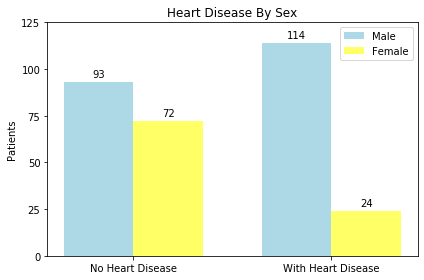

In [4]:
#target are patients with heart disease
yes_t = df[(df['target'] == "No Heart Disease")]
#no_t are patients without heart disease
no_t = df[(df['target'] == "Has Heart Disease")]

#filtered data
men = df[(df['sex'] == "Male")]
women = df[(df['sex'] == "Female")]

men_no_t = df[(df['sex'] == "Male") & (df['target'] == "Has Heart Disease")]
women_no_t = df[(df['sex'] == "Female") & (df['target'] == "Has Heart Disease")]

men_yes_t = df[(df['sex'] == "Male") & (df['target'] == "No Heart Disease")]
women_yes_t = df[(df['sex'] == "Female") & (df['target'] == "No Heart Disease")]

#initial stats
print("Patients: " + str(len(df['age'])))
print("Patients with heart disease: " + str(len(yes_t)))
print("Patients without heart disease: " + str(len(no_t)))
print('Male patients: '+ str(len(men)))
print('Female patients: '+ str(len(women)))
print("\n")

#Grouped Bar Chart
labels = ['No Heart Disease', 'With Heart Disease',]
male = [len(men_yes_t), len(men_no_t)]
female = [len(women_yes_t), len(women_no_t)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='Male', color="lightblue")
rects2 = ax.bar(x + width/2, female, width, label='Female', color="yellow", alpha=.6)
ax.set_ylabel('Patients')
ax.set_title('Heart Disease By Sex')
ax.set_xticks(x)
ax.set_yticks([0, 25, 50, 75, 100, 125])
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


print()
print()

### 3. Age

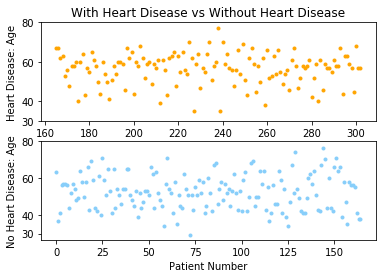

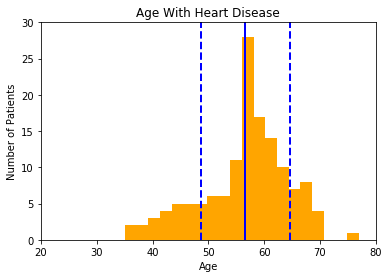

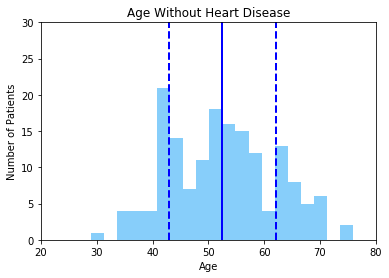


Average age: 54.366336633663366
Youngest patient: 29
Oldest patient: 77

Average age with heart disease: 57.0
Average age with no heart disease: 52.0




In [5]:
#subplot 1 - Patient Age
    #with heart disease
plt.subplot(2, 1, 1)
plt.plot(no_t['age'], '.', color='orange')
plt.title('With Heart Disease vs Without Heart Disease')
plt.yticks([30, 40, 60, 80])
plt.xlabel('Patient Number')
plt.ylabel('Heart Disease: Age')
    #without heart disease
plt.subplot(2, 1, 2)
nhd = plt.plot(yes_t['age'], '.', color='lightskyblue')
plt.yticks([30, 40, 60, 80])
plt.xlabel('Patient Number')
plt.ylabel('No Heart Disease: Age')
plt.show()
print()

plt.hist(no_t['age'], bins=20, color='orange')
plt.title('Age With Heart Disease')
plt.axvline(no_t['age'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(no_t['age'].mean() + no_t['age'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(no_t['age'].mean() - no_t['age'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.yticks([0, 5, 10, 15, 20, 25, 30])
plt.xticks([20, 30, 40, 50, 60, 70, 80])
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()


plt.hist(yes_t['age'], bins=20, color='lightskyblue')
plt.title('Age Without Heart Disease')
plt.axvline(yes_t['age'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(yes_t['age'].mean() + yes_t['age'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(yes_t['age'].mean() - yes_t['age'].std(), color='b', linestyle='dashed', linewidth=2)
plt.yticks([0, 5, 10, 15, 20, 25, 30])
plt.xticks([20, 30, 40, 50, 60, 70, 80])
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

#stats age
print()
print("Average age: " + str(np.mean(df['age'])))
print("Youngest patient: " + str(np.min(df['age'])))
print("Oldest patient: " + str(np.max(df['age'])))
print()
print("Average age with heart disease: " + str(round(np.mean(no_t['age']))))
print("Average age with no heart disease: " + str(round(np.mean(yes_t['age']))))


print()
print()

### 4. Cholestrol


Average cholestrol with heart disease: 251.0
Lowest cholestrol patient with Heart disease: 131
Highest cholestrol patient with Heart disease: 409
Average cholestrol with no heart disease: 242.0
Lowest cholestrol patient with no Heart disease: 126
Highest cholestrol patient with no Heart disease: 564


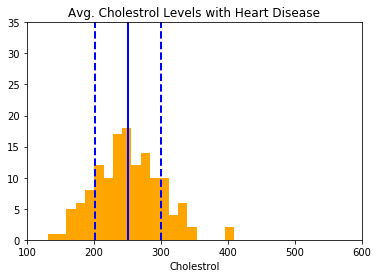

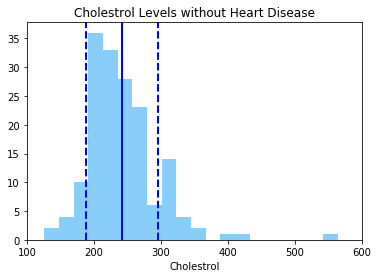



Top 10 Highest Cholestrol 

     age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
85    67  Female   2       115   564    0        0      160      0      1.6   
28    65  Female   2       140   417    1        0      157      0      0.8   
246   56  Female   0       134   409    0        0      150      1      1.9   
220   63  Female   0       150   407    0        0      154      0      4.0   
96    62  Female   0       140   394    0        0      157      0      1.2   
39    65  Female   2       160   360    0        0      151      0      0.8   
4     57  Female   0       120   354    0        1      163      1      0.6   
180   55    Male   0       132   353    0        1      132      1      1.2   
161   55  Female   1       132   342    0        1      166      0      1.2   
215   43  Female   0       132   341    1        0      136      1      3.0   

     slope  ca  thal             target  
85       1   0     3   No Heart Disease  
28       2   1  

In [6]:
print()
print("Average cholestrol with heart disease: " + str(round(np.mean(no_t['chol'])))) 
print("Lowest cholestrol patient with Heart disease: " + str(np.min(no_t['chol'])))
print("Highest cholestrol patient with Heart disease: " + str(np.max(no_t['chol'])))

print("Average cholestrol with no heart disease: " + str(round(np.mean(yes_t['chol'])))) 
print("Lowest cholestrol patient with no Heart disease: " + str(np.min(yes_t['chol'])))
print("Highest cholestrol patient with no Heart disease: " + str(np.max(yes_t['chol'])))

chol_no_t = no_t['chol']
chol_yes_t = yes_t['chol']

plt.hist(chol_no_t, bins=20, color='orange')
plt.title('Avg. Cholestrol Levels with Heart Disease')
plt.axvline(chol_no_t.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(chol_no_t.mean() + chol_no_t.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(chol_no_t.mean() - chol_no_t.std(), color='b', linestyle='dashed', linewidth=2) 
plt.xlabel('Cholestrol')
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])
plt.xticks([100, 200, 300, 400, 500, 600])
plt.show()


plt.hist(chol_yes_t, bins=20, color='lightskyblue')
plt.title('Cholestrol Levels without Heart Disease')
plt.axvline(chol_yes_t.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(chol_yes_t.mean() + chol_yes_t.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(chol_yes_t.mean() - chol_yes_t.std(), color='b', linestyle='dashed', linewidth=2) 
plt.xlabel('Cholestrol')
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])
plt.xticks([100, 200, 300, 400, 500, 600])
plt.show()
print()
print()

print("Top 10 Highest Cholestrol \n")
print(df.nlargest(10, ['chol']), "\n\n\n")
print("Top 10 Lowest Cholestrol \n")
print(df.nsmallest(10, ['chol'])) 

print()
print()

### 5. Chest Pain

Patients: 303
Patients with heart disease: 165
Patients without heart disease: 138
Patients with chest pain: 160
Patients with no_chest pain: 143



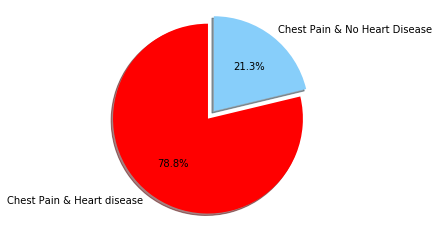

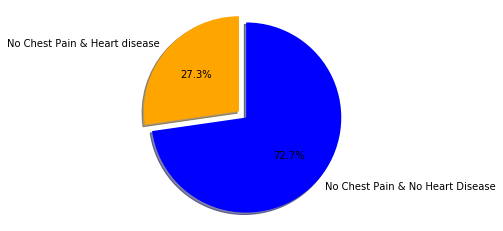

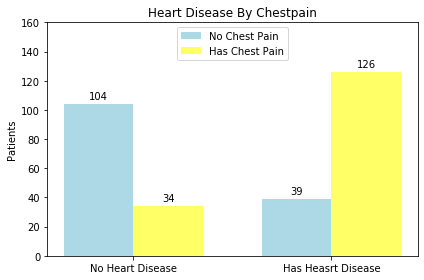

In [46]:
cp = df[(df['cp'] >= 1)]
no_cp = df[(df['cp'] == 0)]

cp_hd = yes_t[(yes_t['cp'] >= 1)]
no_cp_hd = yes_t[(yes_t['cp'] == 0)]

cp_no_hd = no_t[(no_t['cp'] >= 1)]
no_cp_no_hd = no_t[(no_t['cp'] == 0)]

#chest pain stats

print("Patients: " + str(len(df['age'])))
print("Patients with heart disease: " + str(len(yes_t)))
print("Patients without heart disease: " + str(len(no_t)))
print('Patients with chest pain: '+ str(len(cp)))
print('Patients with no_chest pain: '+ str(len(no_cp)))
print()



# Piechart Chest Pain: With and without Heart Disease     
labels = 'Chest Pain & Heart disease', 'Chest Pain & No Heart Disease'
sizes = [126, 34]
colors = ['red', 'lightskyblue']
explode = (0.1, 0.0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()
print()

# Piechart Chest Pain: With and without Heart Disease     
labels = 'No Chest Pain & Heart disease', 'No Chest Pain & No Heart Disease'
sizes = [39, 104]
colors = ['orange', 'blue']
explode = (0.1, 0.0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()
print()



#Group Bar Graph
labels = ['No Heart Disease', 'Has Heasrt Disease',]
cp = [len(cp_no_hd), len(cp_hd)]
no_cp = [len(no_cp_no_hd), len(no_cp_hd)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_cp, width, label='No Chest Pain', color="lightblue")
rects2 = ax.bar(x + width/2, cp, width, label='Has Chest Pain', color="yellow", alpha=.6)
ax.set_ylabel('Patients')
ax.set_title('Heart Disease By Chestpain')
ax.set_xticks(x)
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160])
ax.set_xticklabels(labels)
plt.legend(loc='upper center')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

print()
print()

### 6. Research Proposal

After doing some summary statistics on this data set, there is a strong positive correlation with chest pain and having heart disease. Based on this data, 79% of patients who experience some kind of chest pain had heart disease. I wondered if experiencing chest pain would lead patients to change their lifestyle when given an ooportunity.


Would access to free physical therapy for patients experiencing chest pain and high cholesterol lead them to lower cholestrol? 

- Experiment -
    - Null Hypothesis: Access to free physical therapy for patients experiencing chest pain and high cholesterol will not lead them to lower their cholestrol.
    - Hypothesis: Access to free physical therapy for patients experiencing chest pain and high cholesterol will lead them to lower their cholestrol.

- Sample -
    - Identify 1000 patients with cholesterol over 240mg/dl and had experienced chest pain in the past four weeks. 
    - 50 Patients will be randomly chosen to be in the experimental group and will have access to free therapy. 
    - The physical therapy is a one-to-one 1 hour session once a week for 24 weeks.
    - Another 50 Patients will be randomly chosen to be in the control group and will not have access to free therapy.		
- Procedure -
    - Patients will be surveyed and identified in having high cholesterol, over 240mg/dl, and have experienced chest pain in the past four weeks of being surveyed and identified. 
    - Choose 50 random patients. Those 50 will have access to one-to-one sessions with a qualified therapist for three months. Each session is 1 hour long and is scheduled once per week. 
    - The doctor will explain "It is hospital policy to offer free physical therapy for all patients with cholestrol over 240dmg/dl. The physical therapy will one hour long every week for 24 weeks. 
    - Every week, the 100 patients will have their cholesterol levels checked and recorded with a take home kit and every month they will see their doctor check thier cholestrol levels.
    - 24 weeks after the experiment, we will check back on those patients and ask them if they are more active and run a blood test to check their cholesterol levels.
    
- Outcomes -
We will consider a successful outcome if the experimental patients have at least an average of 10% reduced cholesterol and made a choice to be more active compared to the control group on the final check. 

